## 🔧 Step 1: 安装依赖

In [ ]:
!pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.4
    Uninstalling transformers-4.52.4:
      Successfully uninstalled transformers-4.52.4


### Local Inference on GPU
Model page: https://huggingface.co/microsoft/layoutlmv3-base

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/microsoft/layoutlmv3-base)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [ ]:
# Load model directly
from transformers import AutoModel
model = AutoModel.from_pretrained("microsoft/layoutlmv3-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q transformers pytesseract layoutparser pillow opencv-python matplotlib datasets seqeval
!apt-get -qq install tesseract-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 115.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 97.6 MB/s eta 0:00:00


## 🔍 Step 2: OCR 识别文本 + 坐标

In [ ]:
from PIL import Image
import pytesseract

image_path = '/content/drive/MyDrive/dataset/invoice/batch1-0002.jpg'
image = Image.open(image_path).convert("RGB")
ocr_data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

words = []
boxes = []
width, height = image.size

for i in range(len(ocr_data["text"])):
    if ocr_data["text"][i].strip() != "":
        words.append(ocr_data["text"][i])
        x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]
        # normalize to 0-1000 as required by LayoutLM
        boxes.append([
            int(1000 * x / width),
            int(1000 * y / height),
            int(1000 * (x + w) / width),
            int(1000 * (y + h) / height)
        ])

In [ ]:
words

['Invoice',
 'no:',
 '12847181',
 'Date',
 'of',
 'issue:',
 'Seller:',
 'Fitzpatrick',
 'and',
 'Sons',
 '00480',
 'Cook',
 'Cove',
 'Spencerport,',
 'UT',
 '12036',
 'Tax',
 'Id:',
 '998-99-5253',
 'IBAN:',
 'GB92PBPQ73499358975916',
 'ITEMS',
 'No.',
 'Description',
 'Qty',
 '1.',
 'HP',
 'Desktop',
 'Computer',
 'PC',
 'J]',
 '4,00',
 'Core',
 'i5',
 '16GB',
 '2TB',
 'HD',
 '256GB',
 'SSD',
 '22"',
 'LCD',
 'J]',
 'Windows',
 '10',
 '2.',
 'CUSTOM',
 'BUILT',
 'AMD',
 'RYZEN',
 '3,00',
 'THREADRIPPER',
 'GAMING',
 'COMPUTER',
 ',',
 '32',
 'GB',
 'RAM,',
 '3:',
 'Fast',
 'Dell',
 'Optiplex',
 'Desktop',
 'PC',
 '1,00',
 'Computer',
 'Dual',
 'Core',
 '3.4Ghz',
 '8GB',
 '1TB',
 'Win',
 '10',
 'Pro',
 'WIFI',
 '4.',
 'Dell',
 'Optiplex',
 '790',
 'Computer',
 'i7',
 '3,00',
 '@',
 '3.40',
 'Ghz',
 'Quad',
 'Core',
 '250GB',
 '4GB',
 'Working',
 'ay',
 'Vintage',
 'Microsolutions',
 'Pentium',
 '2,00',
 '133mhz',
 'Desktop',
 'Tower',
 'PC',
 'Windows',
 '95',
 '5.25',
 'Floppy',
 'SU

## 🤖 Step 3: 加载 LayoutLMv3 模型并推理

In [ ]:
from transformers import AutoProcessor, AutoModelForTokenClassification
import torch

processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)
model = AutoModelForTokenClassification.from_pretrained("microsoft/layoutlmv3-base")

encoding = processor(image, words, boxes=boxes, return_tensors="pt", truncation=True, padding="max_length")

with torch.no_grad():
    outputs = model(**encoding)

logits = outputs.logits
predicted_ids = logits.argmax(-1).squeeze().tolist()
tokens = processor.tokenizer.convert_ids_to_tokens(encoding["input_ids"].squeeze())

labels = [model.config.id2label[i] for i in predicted_ids]

preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1731: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


## 📤 Step 4: 转换为 JSON 输出格式

In [ ]:
results = []
for word, box, label in zip(words, boxes, labels[1:len(words)+1]):  # skip [CLS]
    if label != "O":
        results.append({
            "text": word,
            "bbox": box,
            "label": label
        })

import json
print(json.dumps(results, indent=2))

[
  {
    "text": "Invoice",
    "bbox": [
      82,
      32,
      160,
      44
    ],
    "label": "LABEL_0"
  },
  {
    "text": "no:",
    "bbox": [
      171,
      35,
      203,
      44
    ],
    "label": "LABEL_0"
  },
  {
    "text": "12847181",
    "bbox": [
      214,
      32,
      322,
      44
    ],
    "label": "LABEL_0"
  },
  {
    "text": "Date",
    "bbox": [
      82,
      62,
      123,
      71
    ],
    "label": "LABEL_1"
  },
  {
    "text": "of",
    "bbox": [
      131,
      61,
      148,
      71
    ],
    "label": "LABEL_1"
  },
  {
    "text": "issue:",
    "bbox": [
      155,
      61,
      206,
      71
    ],
    "label": "LABEL_1"
  },
  {
    "text": "Seller:",
    "bbox": [
      81,
      191,
      152,
      201
    ],
    "label": "LABEL_1"
  },
  {
    "text": "Fitzpatrick",
    "bbox": [
      87,
      218,
      172,
      229
    ],
    "label": "LABEL_0"
  },
  {
    "text": "and",
    "bbox": [
      179,
      218,
      208,


## 🎨 Step 5: 可视化抽取的实体标签

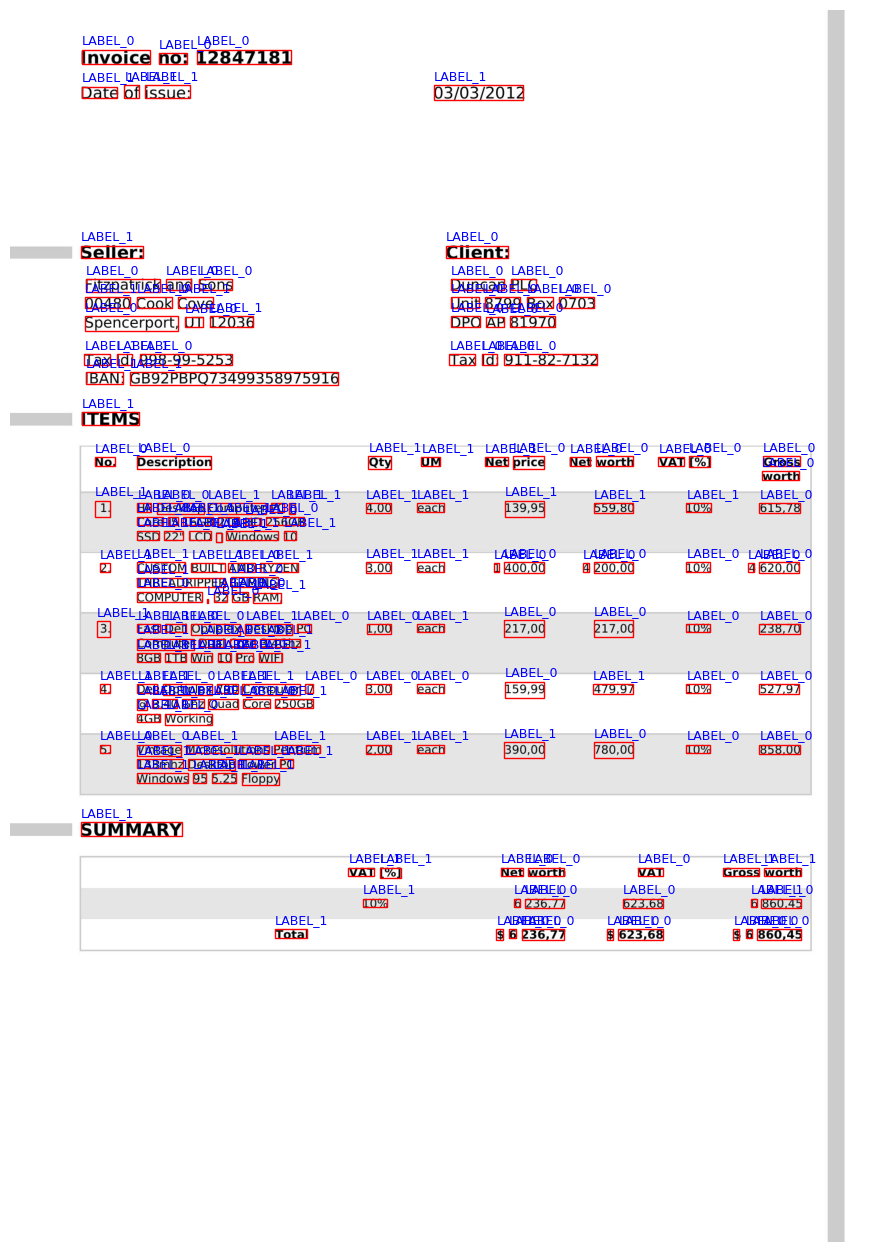

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(12, 16))
ax.imshow(image)

for result in results:
    box = result["bbox"]
    label = result["label"]
    rect = patches.Rectangle((box[0]*image.width/1000, box[1]*image.height/1000),
                             (box[2]-box[0])*image.width/1000,
                             (box[3]-box[1])*image.height/1000,
                             linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.text(box[0]*image.width/1000, box[1]*image.height/1000 - 10, label, fontsize=9, color='blue')

plt.axis("off")
plt.show()

📦 训练 LayoutLMv3 抽取发票信息，需要什么？

1. 🗃️ 数据集（关键）

你需要一批英文（或中文）发票图像，以及每张图的文本+坐标+实体标签标注。

常见格式如：


```
[
  {
    "words": ["Invoice", "#1234", "Date", "2024-08-10", "Total", "$145.00"],
    "boxes": [[...], [...], ...],
    "labels": ["O", "B-INVOICE_NO", "O", "B-DATE", "O", "B-TOTAL"]
  }
]
```



2. 🧠 微调 LayoutLMv3 的训练代码

Hugging Face 提供了 Trainer 类 + 示例脚本，你可以加载你的标注数据，微调模型。

3. 🔁 标注工具推荐（可选）

	•	label-studio
  
	•	doccano

📚 示例字段（发票 NER 任务）

你可以设计以下实体标签：

	•	B-INVOICE_NUMBER
	•	B-DATE
	•	B-TOTAL_AMOUNT
	•	B-SUPPLIER
	•	B-TAX
	•	B-CURRENCY
	•	I-... 对应多字词
	•	O 非关键信息

🛠️ 训练参考（Hugging Face Trainer）

官方文档：LayoutLMv3 Token Classification

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
!pip install -q transformers datasets seqeval pillow
!apt-get -qq install tesseract-ocr

In [ ]:
!pip install -U transformers

In [ ]:
from PIL import Image
from datasets import Dataset
import torch
import json, os

In [ ]:
labels = [
    "O",
    "B-INVOICE_NO", "I-INVOICE_NO",
    "B-DATE", "I-DATE",
    "B-SELLER", "I-SELLER",
    "B-CLIENT", "I-CLIENT",
    "B-TAX_ID", "I-TAX_ID",
    "B-ITEM_DESC", "I-ITEM_DESC",
    "B-QTY", "I-QTY",
    "B-UNIT", "I-UNIT",
    "B-UNIT_PRICE", "I-UNIT_PRICE",
    "B-NET_WORTH", "I-NET_WORTH",
    "B-VAT", "I-VAT",
    "B-GROSS_WORTH", "I-GROSS_WORTH",
    "B-TOTAL", "I-TOTAL"
]

label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for label, i in label2id.items()}

In [ ]:
example_data = [
    {
        "id": "invoice-0001",
        "image_path": "/content/drive/MyDrive/dataset/invoice/batch1-0002.jpg",  # 请替换成你上传的发票图像路径
        "words": ["Invoice", "no:", "51109338", "Date", "of", "issue:", "04/13/2013"],
        "bboxes": [[100,100,200,120], [210,100,260,120], [270,100,360,120],
                   [100,130,150,150], [160,130,190,150], [200,130,260,150], [270,130,360,150]],
        "labels": ["O", "O", "B-INVOICE_NO", "O", "O", "O", "B-DATE"]
    }
]

os.makedirs("data", exist_ok=True)
with open("/content/drive/MyDrive/dataset/invoice/train.json", "w") as f:
    json.dump(example_data, f)
with open("/content/drive/MyDrive/dataset/invoice/valid.json", "w") as f:
    json.dump(example_data, f)

In [ ]:
from transformers import AutoProcessor, AutoModelForTokenClassification

model_name = "microsoft/layoutlmv3-base"
processor = AutoProcessor.from_pretrained(model_name, apply_ocr=False)
model = AutoModelForTokenClassification.from_pretrained(
    model_name,
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id
)

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def load_data(train_path, valid_path):
    def load_json(path):
        with open(path, 'r') as f:
            return Dataset.from_list(json.load(f))

    def preprocess(example):
        image = Image.open(example["image_path"]).convert("RGB")
        encoding = processor(
            image,
            example["words"],
            boxes=example["bboxes"],
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=processor.tokenizer.model_max_length,
        )

        seq_len = encoding.input_ids.shape[-1]
        raw_labels = [label2id.get(l, label2id["O"]) for l in example["labels"]]
        padded = raw_labels + [label2id["O"]] * (seq_len - len(raw_labels))
        encoding["labels"] = torch.tensor([padded], dtype=torch.long)

        return {k: v.squeeze(0) for k, v in encoding.items()}

    # Load and preprocess datasets
    train_dataset = load_json(train_path).map(preprocess)
    val_dataset = load_json(valid_path).map(preprocess)

    # ✅ Add this return statement:
    return train_dataset, val_dataset

In [ ]:
train_dataset, val_dataset = load_data("/content/drive/MyDrive/dataset/invoice/train.json", "/content/drive/MyDrive/dataset/invoice/valid.json")


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./model_out",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=3,
    logging_steps=10,
    logging_dir="./logs",
    report_to="none"   # 关闭所有日志上报，包括 wandb
)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1731: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Step,Training Loss


TrainOutput(global_step=3, training_loss=3.2020670572916665, metrics={'train_runtime': 35.5641, 'train_samples_per_second': 0.084, 'train_steps_per_second': 0.084, 'total_flos': 796400667648.0, 'train_loss': 3.2020670572916665, 'epoch': 3.0})

# Result

| Field                           | Meaning                                                                                                                                   |
| ------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| `global_step=3`                 | Training finished after 3 steps (batches). This makes sense if your dataset is small and `num_train_epochs=3`. It means 1 step per epoch. |
| `training_loss=2.71`            | The average training loss across all steps. This is your main signal for whether the model is learning. Lower is better.                  |
| `train_runtime=19.9448`         | Total training time in seconds.                                                                                                           |
| `train_samples_per_second=0.15` | Your training speed, i.e., 0.15 samples/sec. This is slow, but likely expected for LayoutLMv3 + small batch size + heavy preprocessing.   |
| `train_steps_per_second=0.15`   | Speed measured in steps (batches) per second. Since each step is 1 sample, this matches `train_samples_per_second`.                       |
| `total_flos=796,400,667,648`    | Estimated number of floating point operations used during training. Useful for efficiency benchmarking.                                   |
| `epoch=3.0`                     | You completed all 3 requested epochs.                                                                                                     |
